# EDA

Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 55)
sns.set_style(style='darkgrid')
pd.set_option('display.max_rows', 200)

### Import cleaned data

In [84]:
df_19 = pd.read_csv('../data/cleaned_data.csv')

In [86]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117427 entries, 0 to 117426
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     117427 non-null  int64  
 1   Unnamed: 0.1                   117427 non-null  int64  
 2   CRASH_RECORD_ID                117427 non-null  object 
 3   RD_NO                          117427 non-null  object 
 4   CRASH_DATE_EST_I               8640 non-null    object 
 5   CRASH_DATE                     117427 non-null  object 
 6   POSTED_SPEED_LIMIT             117427 non-null  int64  
 7   TRAFFIC_CONTROL_DEVICE         117427 non-null  object 
 8   DEVICE_CONDITION               117427 non-null  object 
 9   WEATHER_CONDITION              117427 non-null  object 
 10  LIGHTING_CONDITION             117427 non-null  object 
 11  FIRST_CRASH_TYPE               117427 non-null  object 
 12  TRAFFICWAY_TYPE               

In [88]:
df_19.drop(columns = ['Unnamed: 0','Unnamed: 0.1'],inplace = True)

In [89]:
df_19.set_index('RD_NO',inplace=True)

In [90]:
df_19.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
RD_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JC111663,cb2b9a910babe20dfad7fc27c04c29e7b199fa94dc57bf1ec97...,NaN,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/10/2019 02:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,235,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093)
JC100635,efa10cf15e9c7c9df8a9e946a85eda9836f66af895c98269e32...,Y,01/01/2019 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:10:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3332,W,MAYPOLE AVE,1123,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.883685,-87.710043,POINT (-87.710042988194 41.883684713555)
JC100780,0777b210b7a60ac1338d90e20520d421c3241971049303ff115...,NaN,01/01/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",01/01/2019 02:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1649,W,ADDISON ST,1922,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.946856,-87.670809,POINT (-87.67080913181 41.946856430289)
JC100033,caa1629056b16f2e6ec6797d6252d6da8ec1142c0ee982a8b3f...,NaN,01/01/2019 12:04:00 AM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,2.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",01/01/2019 12:14:00 AM,IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,188,W,MADISON ST,122,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,3,1,41.882058,-87.633478,POINT (-87.633478360366 41.882058104945)
JC100171,cb22668bf69d9c99e50c615a9ff996328190859a0e83510ce9a...,NaN,01/01/2019 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:07:00 AM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, N...",FAILING TO REDUCE SPEED TO AVOID CRASH,4054,N,MOBILE AVE,1624,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0,3,1,41.954529,-87.784311,POINT (-87.784311465374 41.9545292855)


# Top 15 primary causes

In [91]:
known_cause = df_19[df_19['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']

In [92]:
known_cause = known_cause[known_cause['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']

In [93]:
def cntplot_sorted_value_h(y,data,title):
    plt.figure(figsize=(12,8))
    sns.countplot( y = y , 
                   data = data,
                  order = data[y].value_counts().index[:15])
    plt.title(title);

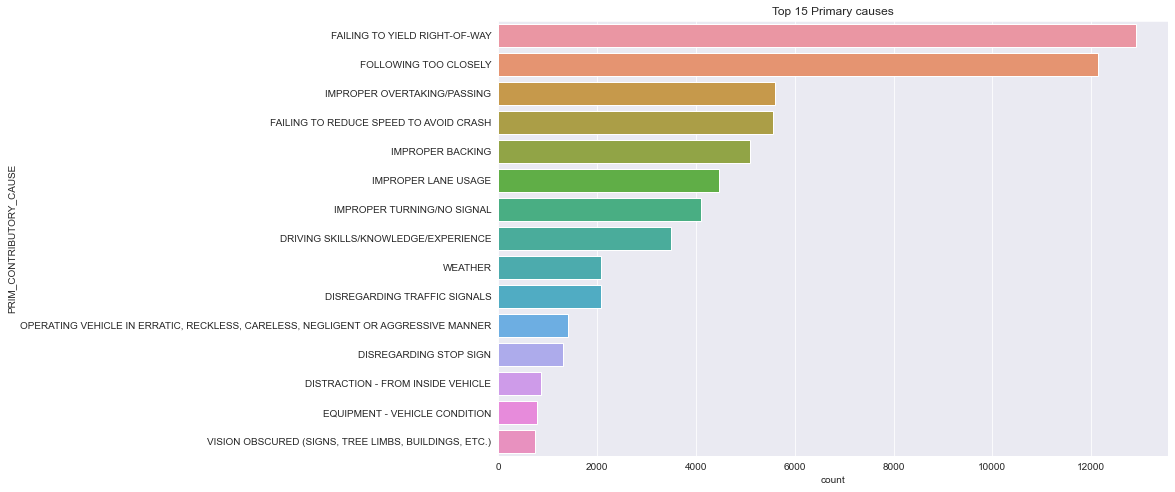

In [94]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause, 'Top 15 Primary causes')

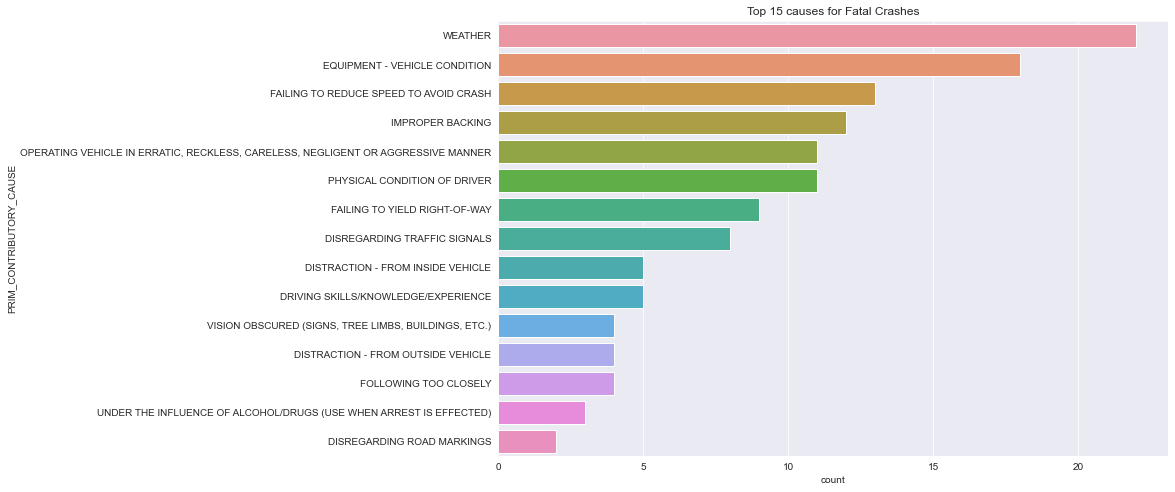

In [95]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause[known_cause['INJURIES_FATAL']!=0],
                       'Top 15 causes for Fatal Crashes')

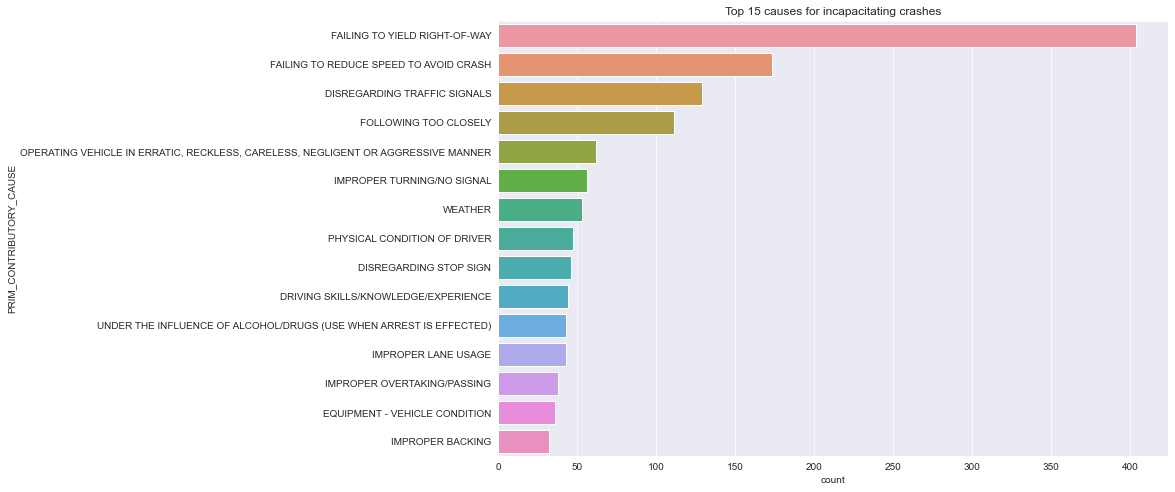

In [96]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause[known_cause['INJURIES_INCAPACITATING']!=0],'Top 15 causes for incapacitating crashes')

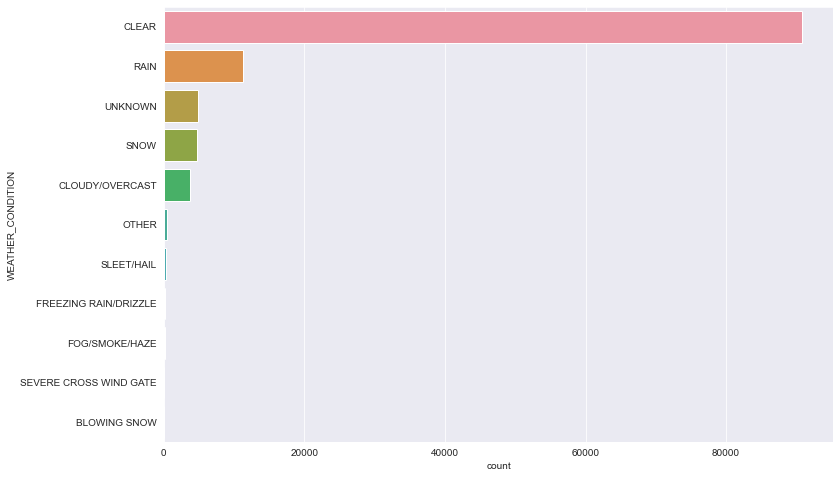

In [107]:
cntplot_sorted_value_h('WEATHER_CONDITION' , df_19)

Surprisingly, bad weather does not seem to be a huge  contributory factor

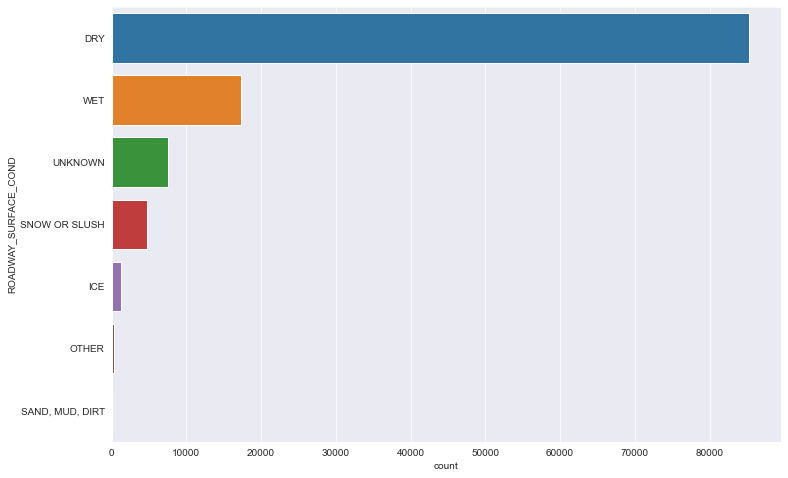

In [108]:
cntplot_sorted_value_h('ROADWAY_SURFACE_COND', df_19)

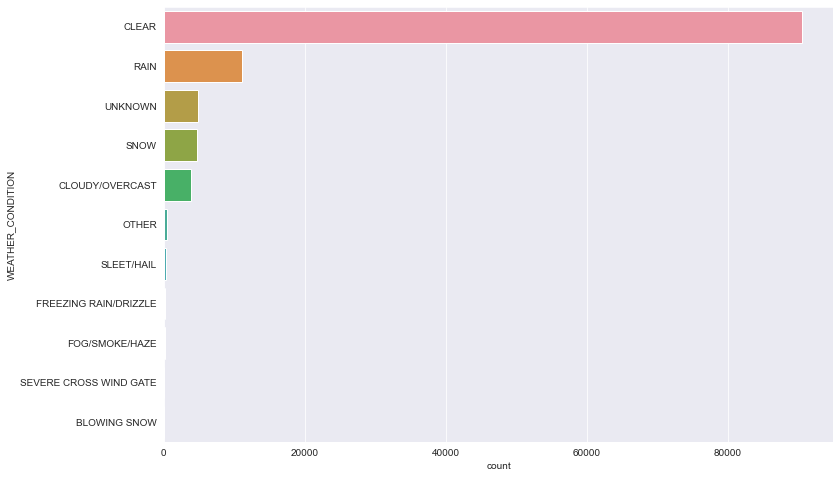

In [117]:
cntplot_sorted_value_h('WEATHER_CONDITION', df_19[df_19['INJURIES_FATAL']==0])

Confirms the conclusion from the weather plot. The weather colums is not consistent with primary cause

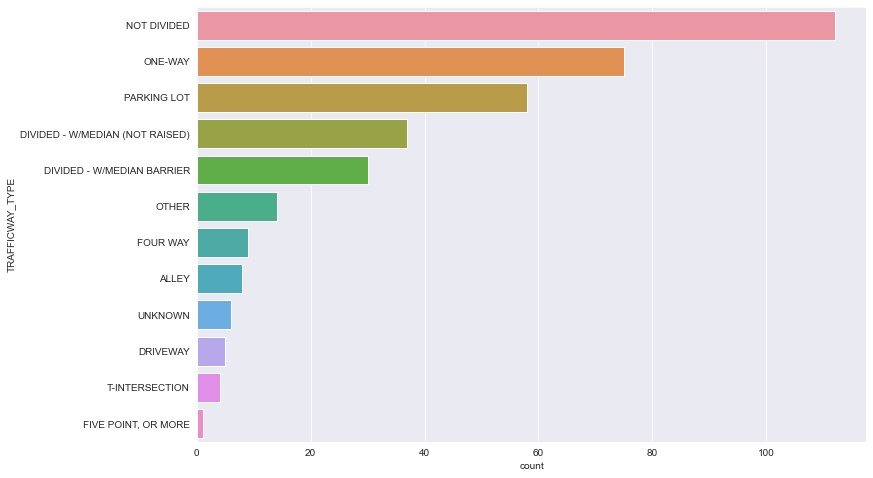

In [122]:
cntplot_sorted_value_h('TRAFFICWAY_TYPE', df_19[df_19['INJURIES_FATAL']!=0])

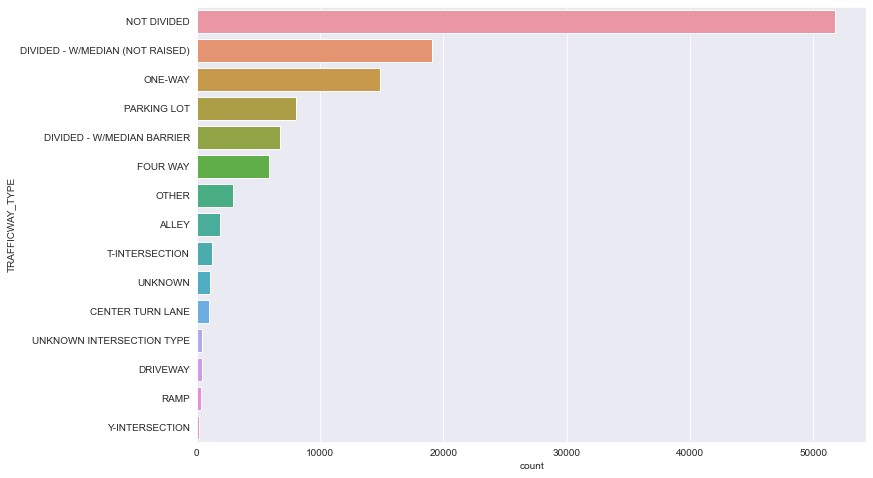

In [123]:
cntplot_sorted_value_h('TRAFFICWAY_TYPE', df_19[df_19['INJURIES_FATAL']==0])

Not divided Trafficways have more than twice the number of crashes of the next highest number of crashes by trafficway

In [106]:
def countplt( x , data):
    sns.countplot( x = x,
                 data = data);

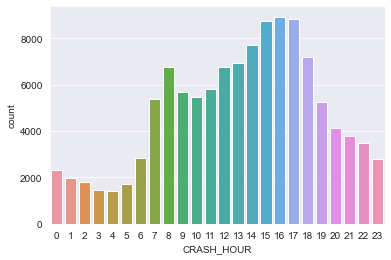

In [107]:
countplt('CRASH_HOUR', df_19)

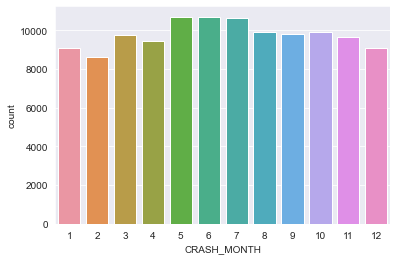

In [108]:
countplt('CRASH_MONTH', df_19)

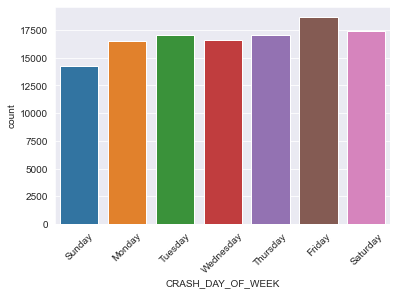

In [109]:
countplt('CRASH_DAY_OF_WEEK', df_19)
plt.xticks(ticks= [0,1,2,3,4,5,6],
           labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
           rotation = 45);

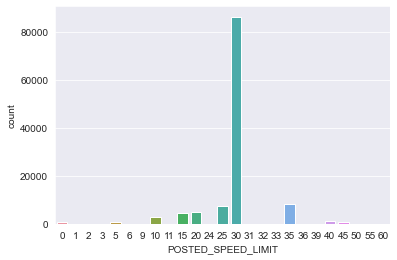

In [110]:
countplt('POSTED_SPEED_LIMIT' , df_19) 

In [115]:
 df_19['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 67144
FUNCTIONING PROPERLY        40801
UNKNOWN                      6587
OTHER                        1018
FUNCTIONING IMPROPERLY        555
NOT FUNCTIONING               343
WORN REFLECTIVE MATERIAL       44
MISSING                        18
Name: DEVICE_CONDITION, dtype: int64

In [128]:
df_19[(df_19['INJURIES_FATAL']!=0) & (df_19['PRIM_CONTRIBUTORY_CAUSE'] == 'WEATHER')]

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
4193,3a16e40a5ea4cee1f5526edea55e1dff6cf9927405736e85aee...,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER NONCOLLISION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",WEATHER,WEATHER,122,1,NO INDICATION OF INJURY,0,0,0,0,0,0,23,3,1
11159,493af341b6f43a5a484106a3b609978a3ce8fd19431c7785d38...,30,NO CONTROLS,NO CONTROLS,OTHER,DARKNESS,OTHER OBJECT,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,NOT APPLICABLE,1634,2,NO INDICATION OF INJURY,0,0,0,0,0,0,20,5,2
12593,4bdc9f28dba38cd6a02f3c9b59c975b7d63037b5b2455a0e944...,10,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT ON HILLCREST,ICE,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,UNABLE TO DETERMINE,2212,2,NO INDICATION OF INJURY,0,0,0,0,0,0,10,3,2
16359,4319e8c3b24be8306f817adfb1c7341b070db1df303a5eb466a...,25,NO CONTROLS,NO CONTROLS,SEVERE CROSS WIND GATE,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",WEATHER,NOT APPLICABLE,1631,4,NO INDICATION OF INJURY,0,0,0,0,0,0,12,1,2
16434,82e6d2e85a2ee233950a8d5d1d722edb3d1bf76fed5c251f645...,30,NO CONTROLS,NO CONTROLS,SEVERE CROSS WIND GATE,DAYLIGHT,OTHER OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,UNABLE TO DETERMINE,1915,1,NO INDICATION OF INJURY,0,0,0,0,0,0,16,1,2
19405,d025d9837226639046d3d740922683b8d98fa8f4ab6680f206f...,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,$500 OR LESS,WEATHER,NOT APPLICABLE,712,2,NO INDICATION OF INJURY,0,0,0,0,0,0,12,4,3
21962,db94899b89e27abedeb405ba950542995658a6270073ba6799a...,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",WEATHER,WEATHER,1712,2,NO INDICATION OF INJURY,0,0,0,0,0,0,18,5,3
31745,fecfdcb303b6b97260affee2be26dc3c61388bc0d3dfa5e0164...,30,NO CONTROLS,NO CONTROLS,SNOW,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",WEATHER,NOT APPLICABLE,1634,3,NO INDICATION OF INJURY,0,0,0,0,0,0,10,1,4
34213,f7dda79a6d57a7fc3c000c2470f797d7d618b6e5d8babd3be6d...,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",WEATHER,WEATHER,124,2,NO INDICATION OF INJURY,0,0,0,0,0,0,15,2,4
35922,44a010da622254358b46ebc4821c17f3308b871c7c313e2e9ca...,25,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,ONE-WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,NOT APPLICABLE,1723,1,NO INDICATION OF INJURY,0,0,0,0,0,0,19,7,4


## EDA with K-Means clusters

In [116]:
df_model = pd.read_csv('../data/cluster_info.csv')

In [118]:
df_model.set_index('RD_NO',inplace = True)

In [119]:
df_19['cluster'] = df_model['cluster']

In [120]:
df_19.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,cluster
RD_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JC111663,cb2b9a910babe20dfad7fc27c04c29e7b199fa94dc57bf1ec97...,NaN,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/10/2019 02:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,235,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093),0
JC100635,efa10cf15e9c7c9df8a9e946a85eda9836f66af895c98269e32...,Y,01/01/2019 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:10:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3332,W,MAYPOLE AVE,1123,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.883685,-87.710043,POINT (-87.710042988194 41.883684713555),0
JC100780,0777b210b7a60ac1338d90e20520d421c3241971049303ff115...,NaN,01/01/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",01/01/2019 02:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1649,W,ADDISON ST,1922,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.946856,-87.670809,POINT (-87.67080913181 41.946856430289),0
JC100033,caa1629056b16f2e6ec6797d6252d6da8ec1142c0ee982a8b3f...,NaN,01/01/2019 12:04:00 AM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,2.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",01/01/2019 12:14:00 AM,IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,188,W,MADISON ST,122,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,3,1,41.882058,-87.633478,POINT (-87.633478360366 41.882058104945),0
JC100171,cb22668bf69d9c99e50c615a9ff996328190859a0e83510ce9a...,NaN,01/01/2019 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:07:00 AM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, N...",FAILING TO REDUCE SPEED TO AVOID CRASH,4054,N,MOBILE AVE,1624,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0,3,1,41.954529,-87.784311,POINT (-87.784311465374 41.9545292855),0


In [124]:
df_19['cluster'].value_counts()

0    104534
1     12893
Name: cluster, dtype: int64

In [125]:
df_19.drop(columns = ['BEAT_OF_OCCURRENCE'], inplace=True)

In [126]:
df_19.groupby('cluster').mean().T

cluster,0,1
POSTED_SPEED_LIMIT,28.274437,29.658109
LANE_CNT,2.482902,2.749433
STREET_NO,3591.213309,3634.563872
NUM_UNITS,2.015842,2.135112
INJURIES_TOTAL,0.033624,1.464981
INJURIES_FATAL,0.000000,0.008377
INJURIES_INCAPACITATING,0.000000,0.184053
INJURIES_NON_INCAPACITATING,0.000019,0.977895
INJURIES_REPORTED_NOT_EVIDENT,0.033605,0.294656
INJURIES_NO_INDICATION,2.126603,1.373691


In [127]:
df_model.groupby('cluster').mean().T

cluster,0,1
POSTED_SPEED_LIMIT,28.274437,29.658109
NUM_UNITS,2.015842,2.135112
MOST_SEVERE_INJURY,0.000019,0.876289
CRASH_HOUR,13.120324,13.182735
CRASH_DAY_OF_WEEK,4.118832,4.117971
CRASH_MONTH,6.514302,6.759094
INJURIES_TOTAL,0.033539,1.464981
INJURIES_FATAL,0.000000,0.008377
INJURIES_INCAPACITATING,0.000000,0.184053
INJURIES_NON_INCAPACITATING,0.000019,0.977895
